In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os

In [43]:
train = pd.read_csv('digitTrain.csv')
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
test= pd.read_csv('digitTest.csv')
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
y_train = train["label"]
X_train = train.drop(labels = ["label"],axis = 1) 

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

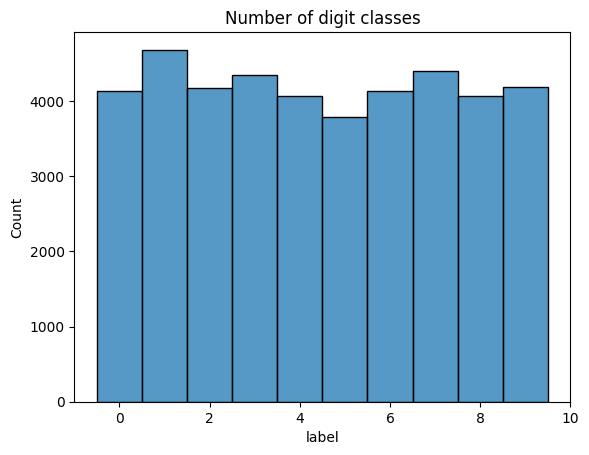

In [46]:
plt.figure()
g = sns.histplot(data = y_train, discrete=True)
plt.title("Number of digit classes")
y_train.value_counts()

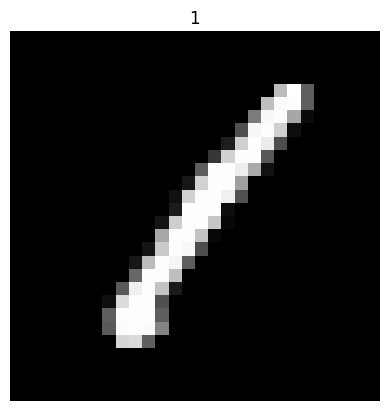

In [47]:
img = X_train.iloc[0].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[0,0])
plt.axis("off")
plt.show()

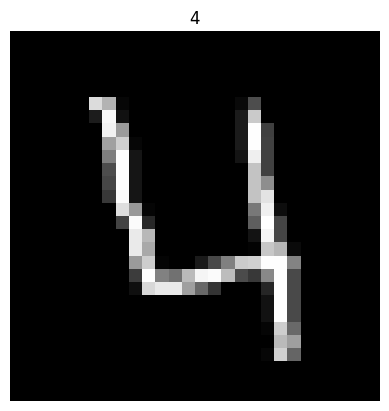

In [48]:
img = X_train.iloc[3].to_numpy()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[3,0])
plt.axis("off")
plt.show()

In [49]:
X_train = X_train / 255.0
test = test / 255.0
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 784)
test shape:  (28000, 784)


In [50]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


In [51]:
from tensorflow.keras.utils import to_categorical
from tensorflow import keras

In [52]:
y_train = to_categorical(y_train, num_classes = 10)

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state=2)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_val.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


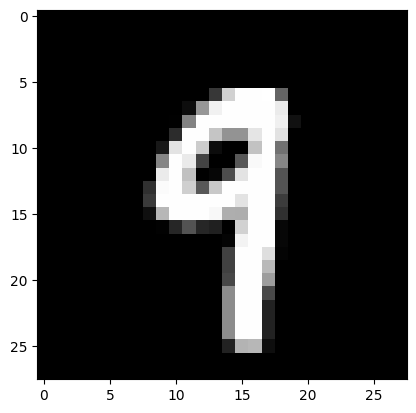

In [54]:
plt.imshow(X_train[2][:,:,0],cmap='gray')
plt.show()

In [55]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()

model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [56]:
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

In [57]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [58]:
epochs = 10  
batch_size = 250

In [59]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=5,
    zoom_range = 0.1,
    width_shift_range=0.1,
    height_shift_range=0.1, 
    horizontal_flip=False,  
    vertical_flip=False)  

datagen.fit(X_train)

In [60]:
history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size), 
                               epochs = epochs, validation_data = (X_val,y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10


2023-06-29 03:44:11.197142: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


151/151 [==============================] - 64s 401ms/step - loss: 1.1731 - accuracy: 0.6060 - val_loss: 0.2627 - val_accuracy: 0.9271
Epoch 2/10
151/151 [==============================] - 53s 348ms/step - loss: 0.4919 - accuracy: 0.8423 - val_loss: 0.1528 - val_accuracy: 0.9529
Epoch 3/10
151/151 [==============================] - 50s 330ms/step - loss: 0.3371 - accuracy: 0.8923 - val_loss: 0.1127 - val_accuracy: 0.9638
Epoch 4/10
151/151 [==============================] - 48s 320ms/step - loss: 0.2809 - accuracy: 0.9127 - val_loss: 0.0953 - val_accuracy: 0.9721
Epoch 5/10
151/151 [==============================] - 55s 364ms/step - loss: 0.2440 - accuracy: 0.9231 - val_loss: 0.0812 - val_accuracy: 0.9769
Epoch 6/10
151/151 [==============================] - 51s 330ms/step - loss: 0.2217 - accuracy: 0.9315 - val_loss: 0.0703 - val_accuracy: 0.9800
Epoch 7/10
151/151 [==============================] - 53s 350ms/step - loss: 0.1967 - accuracy: 0.9381 - val_loss: 0.0694 - val_accuracy: 0.9

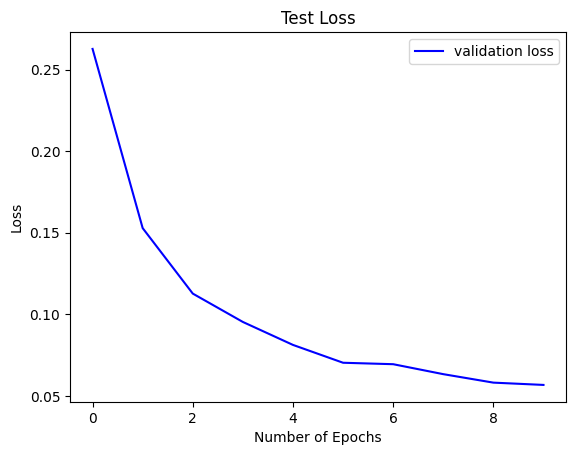

In [61]:
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

132/132 [==============================] - 2s 14ms/step


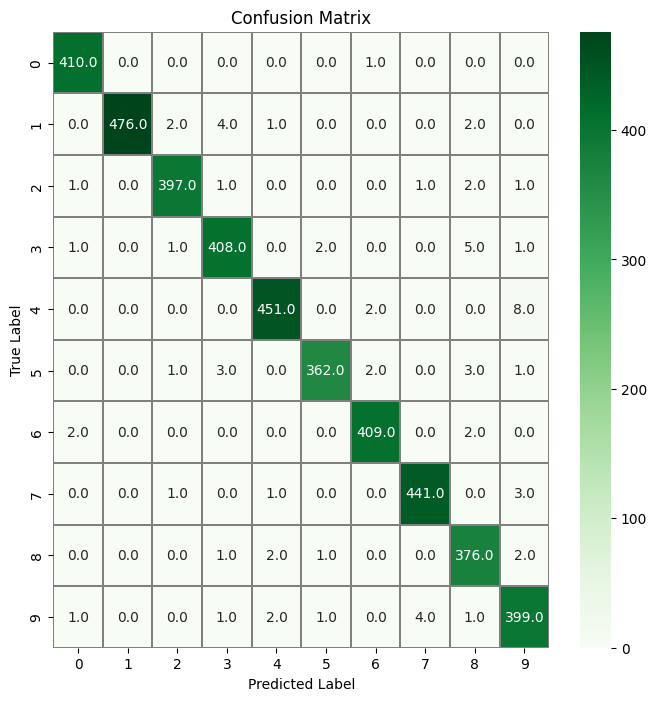

In [64]:
import seaborn as sns
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred,axis = 1) 
y_true = np.argmax(y_val,axis = 1) 
confusion_mtx = confusion_matrix(y_true, y_pred_classes) 
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()